In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/My Drive/MyFolder/job_info.csv'
job_info = pd.read_csv(path)

path = '/content/drive/My Drive/MyFolder/job_skills.csv'
job_skills = pd.read_csv(path)

In [ ]:
job_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                7374 non-null   int64  
 1   posting_date          7374 non-null   object 
 2   title                 7374 non-null   object 
 3   position_type         7374 non-null   object 
 4   position_level        7374 non-null   object 
 5   yoe                   7374 non-null   int64  
 6   location              7374 non-null   object 
 7   number_of_applicants  5242 non-null   float64
 8   company_name          7341 non-null   object 
 9   company_industry      7298 non-null   object 
 10  company_size          7295 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 633.8+ KB


In [ ]:
job_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52117 entries, 0 to 52116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   job_id  52117 non-null  float64
 1   skills  51361 non-null  object 
dtypes: float64(1), object(1)
memory usage: 814.5+ KB


In [ ]:
job_info['posting_date'] = pd.to_datetime(job_info['posting_date'])

In [ ]:
job_info['year'] = job_info['posting_date'].dt.strftime('%Y')
job_info['month'] = job_info['posting_date'].dt.strftime('%m')
job_info.drop('posting_date', axis=1, inplace=True)

# Overall Stats

In [ ]:
job_info.groupby(['year', 'title'])['job_id'].count().unstack(level=-1)

title,Data Analyst,Data Architect,Data Engineer,Data Scientist
year,,,,
2017,177,20,469,243
2018,221,34,510,293
2019,233,34,550,316
2020,368,56,914,517
2021,510,71,1169,669


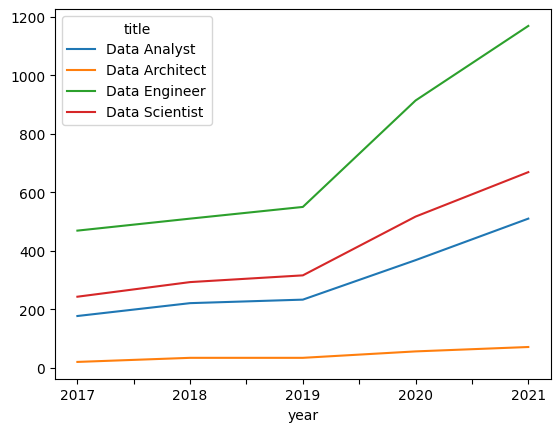

In [ ]:
job_info.groupby(['year', 'title'])['job_id'].count().unstack(level=-1).plot()
plt.show()

In [ ]:
job_info.groupby(['title', 'position_type'])['job_id'].count().unstack(level=-1)

position_type,Contract,Full-time,Internship,Part-time,Temporary
title,,,,,
Data Analyst,264.0,1232.0,3.0,6.0,4.0
Data Architect,8.0,207.0,NaN,NaN,NaN
Data Engineer,1386.0,2219.0,3.0,2.0,2.0
Data Scientist,771.0,1255.0,5.0,4.0,3.0


In [ ]:
job_info.groupby(['title', 'position_level'])['job_id'].count().unstack(level=-1)

position_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
title,,,,,,
Data Analyst,558.0,3.0,340.0,1.0,5.0,602.0
Data Architect,26.0,2.0,2.0,1.0,NaN,184.0
Data Engineer,580.0,29.0,503.0,6.0,3.0,2491.0
Data Scientist,328.0,22.0,301.0,3.0,8.0,1376.0


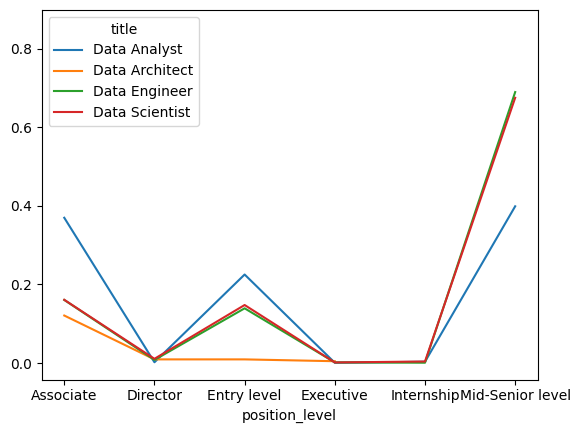

In [ ]:
temp = job_info.groupby(['title', 'position_level'])['job_id'].count().unstack(level=-1)
sum_ = temp.sum(axis=1)
temp.div(sum_, axis=0).T.plot()
plt.show()

In [ ]:
job_info.groupby(['title', 'position_level'])['yoe'].mean().unstack(level=-1)

position_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
title,,,,,,
Data Analyst,3.689964,8.000000,1.594118,15.000000,0.20,5.430233
Data Architect,3.269231,8.000000,2.000000,15.000000,NaN,5.559783
Data Engineer,3.775862,9.655172,1.673956,15.833333,0.00,5.406664
Data Scientist,3.701220,9.181818,1.647841,8.333333,0.25,5.359738


In [ ]:
job_info.groupby(['title'])['company_industry'].nunique()

title
Data Analyst      68
Data Architect    12
Data Engineer     71
Data Scientist    61
Name: company_industry, dtype: int64

In [ ]:
job_info.groupby(['title'])['company_size'].value_counts().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
title,,,,,,,,
Data Analyst,30,105,255,242,150,420,38,244
Data Architect,1,2,14,9,10,169,1,8
Data Engineer,144,244,543,561,224,1594,52,211
Data Scientist,47,117,252,219,164,1004,73,148


# In-depth Stats

### Data Analyst

In [ ]:
da = job_info.query('title == "Data Analyst"').copy()

In [ ]:
table = da.groupby(['year', 'position_level'])['job_id'].count().unstack(level=-1)
table

position_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
year,,,,,,
2017,68.0,NaN,38.0,NaN,1.0,70.0
2018,87.0,1.0,53.0,NaN,NaN,80.0
2019,79.0,1.0,50.0,1.0,3.0,99.0
2020,133.0,1.0,87.0,NaN,1.0,146.0
2021,191.0,NaN,112.0,NaN,NaN,207.0


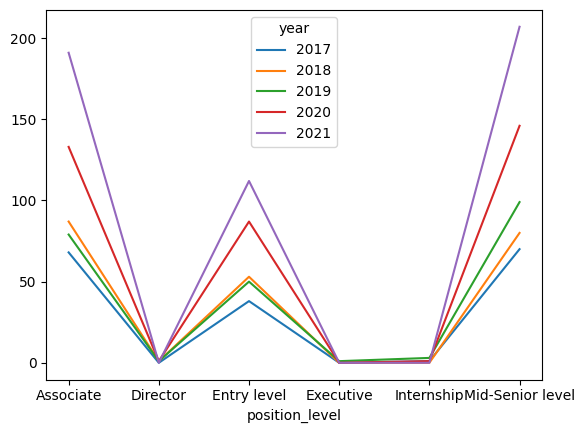

In [ ]:
table.fillna(0, inplace=True)
table.T.plot()
plt.show()

In [ ]:
da.groupby(['position_level', 'year'])['yoe'].mean().unstack(level=-1)

year,2017,2018,2019,2020,2021
position_level,,,,,
Associate,3.676471,3.655172,3.582278,3.721805,3.732984
Director,NaN,8.000000,8.000000,8.000000,NaN
Entry level,1.578947,1.679245,1.600000,1.586207,1.562500
Executive,NaN,NaN,15.000000,NaN,NaN
Internship,0.000000,NaN,0.333333,0.000000,NaN
Mid-Senior level,5.400000,5.700000,5.424242,5.410959,5.352657


In [ ]:
da.groupby(['year', 'month'])['company_industry'].nunique().unstack(level=-1)

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,8,5,10,10,8,12,10,8,8,12,5,8
2018,12,13,7,9,12,10,7,9,8,15,6,11
2019,10,9,10,8,4,9,10,10,11,10,11,15
2020,16,7,2,8,19,14,18,18,11,12,8,11
2021,13,19,16,12,17,11,15,12,16,13,14,13


In [ ]:
da.groupby(['year', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,1,17,23,25,15,64,5,23
2018,5,14,46,36,30,48,6,31
2019,3,16,42,40,19,57,7,45
2020,9,27,66,61,39,99,7,58
2021,12,31,78,80,47,152,13,87


In [ ]:
da.groupby(['position_level', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
position_level,,,,,,,,
Associate,19.0,17.0,73.0,81.0,54.0,173.0,16.0,118.0
Director,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
Entry level,NaN,33.0,69.0,42.0,51.0,75.0,8.0,62.0
Executive,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Internship,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0
Mid-Senior level,11.0,52.0,112.0,117.0,45.0,172.0,14.0,61.0


In [ ]:
da_skills = pd.merge(da, job_skills, how='inner', on='job_id')

In [ ]:
da_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8985 entries, 0 to 8984
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                8985 non-null   int64  
 1   title                 8985 non-null   object 
 2   position_type         8985 non-null   object 
 3   position_level        8985 non-null   object 
 4   yoe                   8985 non-null   int64  
 5   location              8985 non-null   object 
 6   number_of_applicants  8372 non-null   float64
 7   company_name          8899 non-null   object 
 8   company_industry      8867 non-null   object 
 9   company_size          8863 non-null   object 
 10  year                  8985 non-null   object 
 11  month                 8985 non-null   object 
 12  skills                8923 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 982.7+ KB


In [ ]:
da_skills = da_skills[['job_id', 'position_level', 'yoe', 'company_industry', 'company_size', 'year', 'month', 'skills']].copy()

In [ ]:
len(set(da_skills['skills']))

126

In [ ]:
da_skills['skills'].value_counts().sort_values(ascending=False).head(10)

sql          1099
python        692
tableau       662
excel         562
database      425
r             392
microsoft     319
bi            282
looker        279
powerbi       259
Name: skills, dtype: int64

In [ ]:
da_skills.groupby('year')['skills'].nunique()

year
2017     90
2018     89
2019     93
2020    105
2021    112
Name: skills, dtype: int64

In [ ]:
table = da_skills.groupby('year')['skills'].value_counts()
dict_data = {}
for year in range(2017, 2022):
    top = table.loc[str(year)].head(10)
    value = [str(i) + ': ' + str(top[i]) for i in top.index]
    dict_data[year] = value
pd.DataFrame(dict_data)

,2017,2018,2019,2020,2021
0,sql: 136,sql: 171,sql: 170,sql: 256,sql: 366
1,tableau: 79,python: 104,tableau: 100,python: 183,python: 230
2,python: 76,tableau: 98,python: 99,tableau: 164,tableau: 221
3,database: 58,excel: 91,excel: 95,excel: 131,excel: 187
4,excel: 58,r: 64,database: 72,r: 102,database: 147
5,r: 41,database: 53,r: 60,database: 95,r: 125
6,microsoft: 34,bi: 51,bi: 52,microsoft: 79,microsoft: 110
7,bi: 30,looker: 51,microsoft: 46,looker: 77,powerbi: 86
8,etl: 29,microsoft: 50,powerbi: 41,bi: 65,bi: 84
9,looker: 28,powerbi: 50,looker: 39,powerbi: 61,looker: 84


In [ ]:
def top_skill_change_by_level(frame_skill, level):
    table = frame_skill.query('position_level == @level').groupby('year')['skills'].value_counts()
    dict_data = {}
    for year in range(2017, 2022):
        try:
            table.loc[str(year)].head(10)
        except KeyError:
            continue
        else:
            top = table.loc[str(year)].head(10)
            value = [str(i) + ': ' + str(top[i]) for i in top.index]
            dict_data[year] = value
    result = pd.DataFrame(dict_data).rename_axis(level, axis=0)
    return result

In [ ]:
set(da['position_level'])

{'Associate',
 'Director',
 'Entry level',
 'Executive',
 'Internship',
 'Mid-Senior level'}

In [ ]:
top_skill_change_by_level(da_skills, 'Associate')

,2017,2018,2019,2020,2021
Associate,,,,,
0,sql: 51,sql: 70,sql: 59,sql: 103,sql: 137
1,python: 29,python: 41,python: 37,python: 74,python: 101
2,tableau: 27,excel: 38,tableau: 30,tableau: 58,tableau: 74
3,database: 23,tableau: 37,database: 25,r: 46,excel: 70
4,excel: 23,r: 32,excel: 25,excel: 44,r: 68
5,microsoft: 18,powerbi: 24,r: 21,database: 40,database: 60
6,agile: 15,microsoft: 22,bi: 20,microsoft: 38,microsoft: 48
7,r: 15,database: 20,microsoft: 19,looker: 34,looker: 36
8,bi: 13,looker: 19,looker: 18,powerbi: 30,powerbi: 32


In [ ]:
top_skill_change_by_level(da_skills, 'Entry level')

,2017,2018,2019,2020,2021
Entry level,,,,,
0,sql: 28,sql: 40,sql: 31,sql: 47,sql: 64
1,excel: 14,excel: 27,excel: 27,excel: 44,excel: 53
2,python: 13,tableau: 24,tableau: 21,python: 42,python: 42
3,tableau: 12,python: 22,python: 20,tableau: 33,tableau: 39
4,database: 10,bi: 16,r: 16,microsoft: 23,microsoft: 32
5,r: 9,microsoft: 15,bi: 13,r: 23,database: 25
6,golang: 8,looker: 14,powerbi: 13,database: 18,powerbi: 24
7,microsoft: 6,r: 14,database: 12,bi: 16,r: 23
8,etl: 5,powerbi: 12,microsoft: 8,powerbi: 11,bi: 14


In [ ]:
top_skill_change_by_level(da_skills, 'Mid-Senior level')

,2017,2018,2019,2020,2021
Mid-Senior level,,,,,
0,sql: 56,sql: 60,sql: 76,sql: 104,sql: 165
1,tableau: 40,python: 41,tableau: 46,tableau: 72,tableau: 108
2,python: 33,tableau: 36,python: 40,python: 65,python: 87
3,database: 25,excel: 26,excel: 39,excel: 43,excel: 64
4,excel: 21,database: 22,database: 33,database: 37,database: 62
5,r: 16,bi: 18,r: 22,looker: 35,bi: 43
6,looker: 15,looker: 18,microsoft: 19,r: 32,looker: 37
7,bi: 13,r: 18,hadoop: 18,etl: 26,r: 34
8,etl: 12,powerbi: 14,bi: 17,agile: 24,etl: 31


In [ ]:
da_skills.groupby(['year', 'company_size'])['skills'].nunique().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,6,30,42,43,39,55,23,49
2018,4,36,56,41,46,62,21,49
2019,16,32,55,52,36,50,23,55
2020,36,44,65,71,44,68,23,49
2021,20,53,72,74,46,78,25,63


In [ ]:
def top_skill_change_by_size(frame_skill, size):
    table = frame_skill.query('company_size == @size').groupby('year')['skills'].value_counts()
    dict_data = {}
    for year in range(2017, 2022):
        try:
            table.loc[str(year)].head(10)
        except KeyError:
            continue
        else:
            top = table.loc[str(year)].head(10)
            value = [str(i) + ': ' + str(top[i]) for i in top.index]
            dict_data[year] = value
    result = pd.DataFrame(dict_data).rename_axis(size+' employees', axis=0)
    return result

In [ ]:
top_skill_change_by_size(da_skills, '51-200')

,2017,2018,2019,2020,2021
51-200 employees,,,,,
0,sql: 18,sql: 36,sql: 27,sql: 48,sql: 49
1,tableau: 11,excel: 21,excel: 15,python: 35,python: 34
2,python: 7,python: 21,python: 15,tableau: 31,tableau: 27
3,etl: 6,tableau: 19,database: 11,looker: 22,excel: 22
4,excel: 6,r: 15,r: 11,database: 20,r: 21
5,r: 6,looker: 14,tableau: 9,excel: 20,looker: 17
6,agile: 4,bi: 13,agile: 7,r: 17,database: 16
7,bi: 4,database: 7,aws: 7,etl: 13,bi: 11
8,database: 4,etl: 7,etl: 7,microsoft: 13,etl: 11


In [ ]:
top_skill_change_by_size(da_skills, '1,001-5,000')

,2017,2018,2019,2020,2021
"1,001-5,000 employees",,,,,
0,sql: 48,sql: 41,sql: 49,sql: 77,sql: 126
1,python: 31,python: 28,tableau: 29,python: 50,tableau: 72
2,database: 28,tableau: 23,excel: 28,tableau: 46,python: 70
3,tableau: 23,excel: 18,python: 24,excel: 33,database: 60
4,excel: 18,database: 16,database: 23,database: 32,excel: 53
5,agile: 16,microsoft: 12,hadoop: 15,microsoft: 28,microsoft: 38
6,microsoft: 15,r: 12,microsoft: 15,r: 26,hadoop: 30
7,snowflake: 13,bi: 11,bi: 13,agile: 18,agile: 27
8,r: 12,powerbi: 11,agile: 10,hadoop: 18,powerbi: 26


In [ ]:
top_skill_change_by_size(da_skills, '10,001+')

,2017,2018,2019,2020,2021
"10,001+ employees",,,,,
0,sql: 17,sql: 24,sql: 29,sql: 25,sql: 51
1,excel: 13,excel: 15,tableau: 23,excel: 21,python: 37
2,database: 9,r: 13,database: 21,python: 21,excel: 36
3,tableau: 8,python: 12,r: 21,r: 20,r: 36
4,golang: 7,sas: 12,python: 19,tableau: 20,tableau: 31
5,r: 7,tableau: 12,excel: 18,database: 14,database: 29
6,microsoft: 6,word: 11,microsoft: 15,microsoft: 14,microsoft: 24
7,word: 6,database: 9,oracle: 14,agile: 13,powerbi: 19
8,powerpoint: 5,microsoft: 9,sas: 14,sas: 13,oracle: 18


### Data Engineer

In [ ]:
de = job_info.query('title == "Data Engineer"').copy()

In [ ]:
table = de.groupby(['year', 'position_level'])['job_id'].count().unstack(level=-1)
table

position_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
year,,,,,,
2017,71.0,5.0,52.0,NaN,NaN,341.0
2018,86.0,8.0,64.0,2.0,NaN,350.0
2019,97.0,2.0,84.0,2.0,3.0,362.0
2020,139.0,8.0,141.0,NaN,NaN,626.0
2021,187.0,6.0,162.0,2.0,NaN,812.0


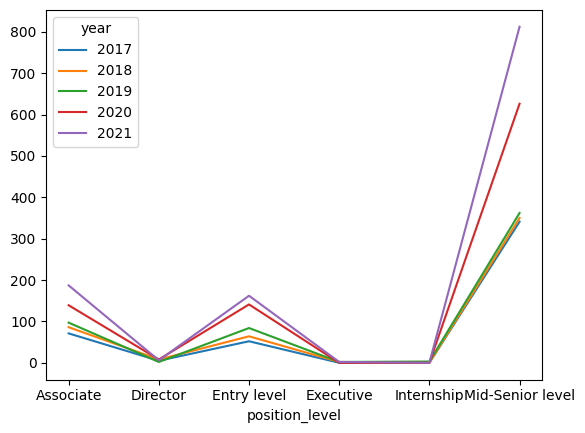

In [ ]:
table.fillna(0, inplace=True)
table.T.plot()
plt.show()

In [ ]:
de.groupby(['position_level', 'year'])['yoe'].mean().unstack(level=-1)

year,2017,2018,2019,2020,2021
position_level,,,,,
Associate,3.957746,3.674419,3.701031,3.856115,3.732620
Director,8.800000,10.500000,9.000000,9.750000,9.333333
Entry level,1.673077,1.734375,1.595238,1.666667,1.697531
Executive,NaN,15.000000,15.000000,NaN,17.500000
Internship,NaN,NaN,0.000000,NaN,NaN
Mid-Senior level,5.410557,5.471429,5.179558,5.476038,5.424877


In [ ]:
de.groupby(['year', 'month'])['company_industry'].nunique().unstack(level=-1)

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,8,7,7,11,7,12,14,8,10,14,9,7
2018,13,11,5,11,10,7,9,10,7,9,12,13
2019,11,8,14,13,9,12,8,14,11,15,9,10
2020,15,12,6,9,19,17,17,14,17,11,6,9
2021,16,15,24,17,13,14,13,12,12,13,14,17


In [ ]:
de.groupby(['year', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,18,34,72,86,29,199,5,22
2018,24,36,79,63,30,232,7,36
2019,16,36,75,71,37,250,9,48
2020,38,72,139,148,55,397,13,46
2021,48,66,178,193,73,516,18,59


In [ ]:
de.groupby(['position_level', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
position_level,,,,,,,,
Associate,10.0,28.0,90.0,116.0,76.0,178.0,12.0,63.0
Director,NaN,2.0,7.0,9.0,1.0,5.0,NaN,5.0
Entry level,1.0,32.0,100.0,84.0,28.0,193.0,10.0,53.0
Executive,NaN,NaN,1.0,NaN,1.0,1.0,NaN,3.0
Internship,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN
Mid-Senior level,133.0,181.0,345.0,352.0,118.0,1215.0,30.0,87.0


In [ ]:
de_skills = pd.merge(de, job_skills, how='inner', on='job_id')
de_skills = de_skills[['job_id', 'position_level', 'yoe', 'company_industry', 'company_size', 'year', 'month', 'skills']].copy()

In [ ]:
len(set(de_skills['skills']))

135

In [ ]:
de_skills['skills'].value_counts().sort_values(ascending=False).head(10)

aws                 2418
cloud               2341
python              1916
sql                 1882
azure               1724
etl                 1191
spark                934
database             875
snowflake            715
machine_learning     688
Name: skills, dtype: int64

In [ ]:
de_skills.groupby('year')['skills'].nunique()

year
2017    113
2018    109
2019    115
2020    119
2021    124
Name: skills, dtype: int64

In [ ]:
table = de_skills.groupby('year')['skills'].value_counts()
dict_data = {}
for year in range(2017, 2022):
    top = table.loc[str(year)].head(10)
    value = [str(i) + ': ' + str(top[i]) for i in top.index]
    dict_data[year] = value
pd.DataFrame(dict_data)

,2017,2018,2019,2020,2021
0,aws: 315,aws: 348,aws: 363,aws: 607,aws: 785
1,cloud: 295,cloud: 333,cloud: 363,cloud: 587,cloud: 763
2,sql: 257,python: 284,python: 288,sql: 496,python: 603
3,python: 251,sql: 255,sql: 286,python: 490,sql: 588
4,azure: 220,azure: 248,azure: 276,azure: 432,azure: 548
5,etl: 148,etl: 163,etl: 183,etl: 295,etl: 402
6,spark: 126,spark: 130,spark: 136,spark: 246,spark: 296
7,database: 116,database: 116,database: 129,database: 232,database: 282
8,snowflake: 94,java: 112,agile: 116,snowflake: 196,agile: 232
9,java: 87,machine_learning: 98,snowflake: 108,machine_learning: 191,snowflake: 221


In [ ]:
top_skill_change_by_level(de_skills, 'Associate')

,2017,2018,2019,2020,2021
Associate,,,,,
0,sql: 56,python: 70,python: 73,python: 105,python: 140
1,python: 55,sql: 51,sql: 68,sql: 102,sql: 120
2,cloud: 37,cloud: 45,cloud: 60,cloud: 78,cloud: 116
3,aws: 30,aws: 44,aws: 48,aws: 76,aws: 105
4,database: 30,etl: 36,spark: 36,spark: 57,etl: 71
5,etl: 30,java: 33,agile: 35,snowflake: 56,spark: 69
6,spark: 22,spark: 30,etl: 34,etl: 53,java: 56
7,snowflake: 21,database: 26,database: 33,database: 49,database: 54
8,agile: 18,agile: 20,snowflake: 29,azure: 48,agile: 52


In [ ]:
top_skill_change_by_level(de_skills, 'Entry level')

,2017,2018,2019,2020,2021
Entry level,,,,,
0,python: 42,sql: 51,sql: 67,sql: 113,sql: 127
1,sql: 39,python: 49,python: 60,python: 104,python: 121
2,aws: 27,azure: 29,cloud: 47,cloud: 72,cloud: 75
3,etl: 25,cloud: 29,aws: 40,aws: 70,aws: 66
4,cloud: 24,aws: 27,agile: 33,database: 53,etl: 63
5,spark: 22,etl: 27,etl: 32,spark: 52,agile: 57
6,azure: 20,spark: 25,azure: 31,etl: 45,spark: 56
7,database: 16,database: 23,spark: 26,agile: 44,azure: 55
8,warehousing: 16,agile: 22,database: 25,azure: 43,database: 54


In [ ]:
top_skill_change_by_level(de_skills, 'Mid-Senior level')

,2017,2018,2019,2020,2021
Mid-Senior level,,,,,
0,aws: 256,aws: 271,aws: 272,aws: 458,aws: 613
1,cloud: 233,cloud: 254,cloud: 252,cloud: 430,cloud: 569
2,azure: 182,azure: 198,azure: 216,azure: 341,azure: 442
3,sql: 158,python: 157,python: 149,python: 276,sql: 337
4,python: 152,sql: 147,sql: 148,sql: 276,python: 336
5,etl: 91,etl: 95,etl: 114,etl: 194,etl: 264
6,spark: 81,spark: 71,spark: 73,spark: 135,database: 170
7,database: 67,database: 65,database: 70,database: 126,spark: 168
8,redshift: 66,snowflake: 65,redshift: 64,machine_learning: 116,redshift: 145


In [ ]:
de_skills.groupby(['year', 'company_size'])['skills'].nunique().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,42,67,81,83,74,82,24,61
2018,49,59,85,66,70,85,36,77
2019,31,75,78,82,78,88,38,78
2020,42,91,90,99,80,97,39,73
2021,56,72,99,99,74,99,60,86


In [ ]:
top_skill_change_by_size(de_skills, '51-200')

,2017,2018,2019,2020,2021
51-200 employees,,,,,
0,python: 53,python: 60,python: 52,python: 103,python: 122
1,aws: 50,sql: 53,sql: 48,sql: 96,sql: 119
2,sql: 49,aws: 52,aws: 46,aws: 80,aws: 109
3,cloud: 40,cloud: 48,etl: 37,cloud: 69,cloud: 100
4,etl: 33,etl: 36,cloud: 34,etl: 63,etl: 96
5,spark: 33,spark: 32,spark: 31,spark: 55,spark: 72
6,database: 24,java: 28,azure: 29,machine_learning: 50,database: 68
7,azure: 23,azure: 26,redshift: 23,redshift: 39,redshift: 49
8,snowflake: 22,machine_learning: 24,database: 21,nosql: 37,warehousing: 49


In [ ]:
top_skill_change_by_size(de_skills, '201-500')

,2017,2018,2019,2020,2021
201-500 employees,,,,,
0,sql: 68,sql: 45,sql: 52,sql: 110,python: 126
1,python: 57,python: 42,python: 49,python: 100,sql: 124
2,aws: 46,aws: 29,aws: 47,aws: 79,aws: 106
3,cloud: 39,cloud: 24,cloud: 41,cloud: 69,cloud: 80
4,spark: 37,etl: 24,spark: 31,spark: 64,spark: 80
5,etl: 30,spark: 24,etl: 30,etl: 60,etl: 77
6,machine_learning: 26,machine_learning: 18,azure: 27,database: 56,machine_learning: 59
7,airflow: 22,airflow: 16,database: 25,snowflake: 52,azure: 56
8,azure: 21,redshift: 16,agile: 24,airflow: 49,database: 54


In [ ]:
top_skill_change_by_size(de_skills, '1,001-5,000')

,2017,2018,2019,2020,2021
"1,001-5,000 employees",,,,,
0,cloud: 165,aws: 192,cloud: 207,cloud: 322,cloud: 425
1,aws: 161,cloud: 183,aws: 196,aws: 315,aws: 413
2,azure: 150,azure: 173,azure: 185,azure: 292,azure: 391
3,python: 60,python: 71,python: 73,sql: 114,python: 150
4,sql: 49,sql: 56,sql: 68,python: 109,sql: 132
5,spark: 29,java: 33,etl: 39,agile: 57,agile: 87
6,etl: 27,agile: 32,agile: 37,spark: 55,etl: 72
7,agile: 26,spark: 31,spark: 30,etl: 53,spark: 63
8,java: 22,etl: 30,java: 27,database: 44,java: 59


In [ ]:
top_skill_change_by_size(de_skills, '10,001+')

,2017,2018,2019,2020,2021
"10,001+ employees",,,,,
0,sql: 18,sql: 24,sql: 37,cloud: 33,cloud: 42
1,python: 15,cloud: 23,cloud: 30,sql: 30,sql: 38
2,cloud: 11,python: 23,python: 30,python: 29,python: 32
3,agile: 10,azure: 17,agile: 21,azure: 23,database: 27
4,etl: 10,agile: 15,database: 19,spark: 23,etl: 27
5,aws: 9,aws: 14,etl: 18,agile: 18,agile: 21
6,azure: 9,database: 13,azure: 17,database: 18,spark: 20
7,database: 9,etl: 12,spark: 17,etl: 18,server: 18
8,ci/cd: 7,spark: 12,java: 16,aws: 16,machine_learning: 17


### Data Scientist

In [ ]:
ds = job_info.query('title == "Data Scientist"').copy()

In [ ]:
table = ds.groupby(['year', 'position_level'])['job_id'].count().unstack(level=-1)
table

position_level,Associate,Director,Entry level,Executive,Internship,Mid-Senior level
year,,,,,,
2017,46.0,2.0,33.0,1.0,1.0,160.0
2018,56.0,5.0,42.0,1.0,2.0,187.0
2019,51.0,5.0,44.0,1.0,1.0,214.0
2020,74.0,4.0,76.0,NaN,1.0,362.0
2021,101.0,6.0,106.0,NaN,3.0,453.0


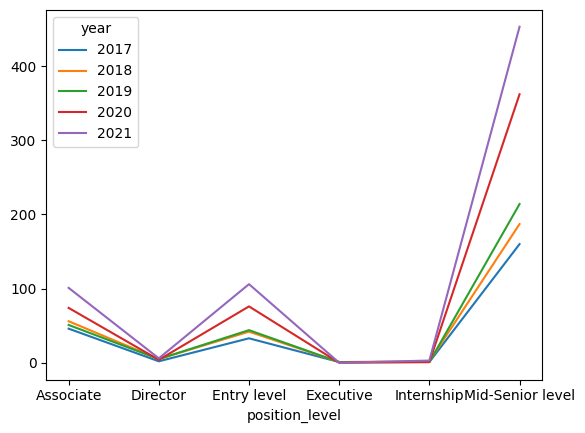

In [ ]:
table.fillna(0, inplace=True)
table.T.plot()
plt.show()

In [ ]:
ds.groupby(['position_level', 'year'])['yoe'].mean().unstack(level=-1)

year,2017,2018,2019,2020,2021
position_level,,,,,
Associate,3.565217,3.500000,3.568627,3.986486,3.732673
Director,5.000000,9.600000,10.000000,10.500000,8.666667
Entry level,1.787879,1.738095,1.568182,1.723684,1.547170
Executive,5.000000,15.000000,5.000000,NaN,NaN
Internship,0.000000,0.500000,0.000000,1.000000,0.000000
Mid-Senior level,5.637500,5.641711,5.116822,5.284530,5.320088


In [ ]:
ds.groupby(['year', 'month'])['company_industry'].nunique().unstack(level=-1)

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,8,6,7,8,6,9,10,7,8,12,11,7
2018,13,11,9,8,12,7,8,6,3,10,10,13
2019,9,9,11,8,9,6,6,10,9,8,7,14
2020,14,10,3,9,14,18,17,15,13,10,3,11
2021,10,17,15,9,15,10,16,13,19,15,13,16


In [ ]:
ds.groupby(['year', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,2,15,36,21,19,113,14,21
2018,8,15,31,37,29,150,9,12
2019,9,15,37,34,28,154,12,22
2020,14,31,62,48,35,274,16,35
2021,14,41,86,79,53,313,22,58


In [ ]:
ds.groupby(['position_level', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
position_level,,,,,,,,
Associate,11.0,15.0,53.0,34.0,57.0,92.0,15.0,47.0
Director,2.0,2.0,8.0,NaN,NaN,8.0,NaN,2.0
Entry level,2.0,24.0,50.0,34.0,37.0,85.0,21.0,48.0
Executive,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Internship,NaN,1.0,NaN,1.0,1.0,2.0,NaN,3.0
Mid-Senior level,31.0,75.0,139.0,150.0,69.0,817.0,37.0,48.0


In [ ]:
ds_skills = pd.merge(ds, job_skills, how='inner', on='job_id')
ds_skills = ds_skills[['job_id', 'position_level', 'yoe', 'company_industry', 'company_size', 'year', 'month', 'skills']].copy()

In [ ]:
len(set(ds_skills['skills']))

122

In [ ]:
ds_skills['skills'].value_counts().sort_values(ascending=False).head(10)

python              1214
machine_learning    1060
sql                  892
r                    702
ai                   558
cloud                393
spark                332
aws                  330
tableau              279
database             180
Name: skills, dtype: int64

In [ ]:
ds_skills.groupby('year')['skills'].nunique()

year
2017     88
2018     87
2019     80
2020     99
2021    108
Name: skills, dtype: int64

In [ ]:
table = ds_skills.groupby('year')['skills'].value_counts()
dict_data = {}
for year in range(2017, 2022):
    top = table.loc[str(year)].head(10)
    value = [str(i) + ': ' + str(top[i]) for i in top.index]
    dict_data[year] = value
pd.DataFrame(dict_data)

,2017,2018,2019,2020,2021
0,python: 142,python: 178,python: 194,python: 301,python: 399
1,machine_learning: 117,machine_learning: 155,machine_learning: 178,machine_learning: 254,machine_learning: 356
2,sql: 104,sql: 129,sql: 129,sql: 230,sql: 300
3,r: 75,r: 103,r: 103,r: 173,r: 248
4,ai: 64,ai: 76,ai: 87,ai: 148,ai: 183
5,cloud: 57,spark: 48,cloud: 67,cloud: 97,cloud: 125
6,aws: 52,cloud: 47,aws: 50,spark: 86,spark: 111
7,spark: 37,aws: 42,spark: 50,aws: 82,aws: 104
8,tableau: 31,tableau: 37,tableau: 38,tableau: 76,tableau: 97
9,azure: 22,agile: 22,database: 28,database: 52,hadoop: 63


In [ ]:
top_skill_change_by_level(ds_skills, 'Associate')

,2017,2018,2019,2020,2021
Associate,,,,,
0,python: 38,python: 51,python: 45,python: 71,python: 90
1,machine_learning: 32,machine_learning: 44,machine_learning: 41,sql: 59,sql: 80
2,sql: 30,sql: 42,sql: 35,machine_learning: 49,machine_learning: 73
3,ai: 21,r: 23,r: 19,r: 36,r: 51
4,r: 17,ai: 18,ai: 17,ai: 28,ai: 37
5,aws: 14,tableau: 15,aws: 16,spark: 23,tableau: 31
6,cloud: 14,cloud: 12,spark: 14,aws: 20,spark: 28
7,tableau: 11,aws: 10,cloud: 13,tableau: 19,aws: 19
8,spark: 8,redshift: 7,tableau: 8,redshift: 14,cloud: 19


In [ ]:
top_skill_change_by_level(ds_skills, 'Entry level')

,2017,2018,2019,2020,2021
Entry level,,,,,
0,python: 26,python: 40,python: 37,python: 60,python: 91
1,sql: 25,machine_learning: 33,machine_learning: 34,machine_learning: 54,machine_learning: 83
2,machine_learning: 24,sql: 26,sql: 24,sql: 49,sql: 74
3,r: 17,r: 21,r: 20,ai: 35,r: 63
4,aws: 10,ai: 14,ai: 14,r: 32,ai: 39
5,cloud: 10,aws: 12,cloud: 10,cloud: 22,cloud: 30
6,ai: 8,spark: 10,sas: 9,tableau: 22,tableau: 28
7,tableau: 6,cloud: 9,tableau: 9,aws: 18,database: 23
8,azure: 5,tableau: 9,aws: 6,spark: 15,aws: 21


In [ ]:
top_skill_change_by_level(ds_skills, 'Mid-Senior level')

,2017,2018,2019,2020,2021
Mid-Senior level,,,,,
0,python: 74,python: 80,python: 105,python: 165,python: 211
1,machine_learning: 57,machine_learning: 71,machine_learning: 97,machine_learning: 146,machine_learning: 193
2,sql: 48,sql: 55,sql: 67,sql: 117,sql: 140
3,r: 38,r: 53,r: 61,r: 102,r: 130
4,ai: 34,ai: 42,ai: 54,ai: 84,ai: 105
5,cloud: 31,spark: 30,cloud: 41,cloud: 61,cloud: 75
6,aws: 26,cloud: 25,spark: 31,spark: 45,aws: 63
7,spark: 22,aws: 18,aws: 26,aws: 42,spark: 63
8,hadoop: 14,hadoop: 14,tableau: 20,tableau: 33,hadoop: 42


In [ ]:
ds_skills.groupby(['year', 'company_size'])['skills'].nunique().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,16,36,55,38,33,55,33,46
2018,18,41,52,44,40,60,24,35
2019,27,38,50,35,41,62,25,37
2020,33,55,59,53,45,78,31,59
2021,29,61,75,60,49,75,44,57


In [ ]:
top_skill_change_by_size(ds_skills, '51-200')

,2017,2018,2019,2020,2021
51-200 employees,,,,,
0,python: 34,python: 28,python: 34,python: 59,python: 77
1,machine_learning: 24,machine_learning: 27,machine_learning: 30,machine_learning: 51,machine_learning: 70
2,sql: 23,sql: 20,sql: 20,sql: 42,sql: 53
3,ai: 19,r: 16,r: 18,r: 31,r: 40
4,aws: 14,ai: 12,ai: 15,ai: 28,ai: 32
5,cloud: 11,aws: 10,cloud: 9,aws: 18,tableau: 23
6,r: 11,jupyter: 6,aws: 7,tableau: 17,aws: 20
7,spark: 9,spark: 5,spark: 6,cloud: 11,spark: 19
8,tableau: 8,bash: 3,tableau: 6,spark: 11,cloud: 16


In [ ]:
top_skill_change_by_size(ds_skills, '201-500')

,2017,2018,2019,2020,2021
201-500 employees,,,,,
0,python: 20,python: 37,python: 33,python: 46,python: 75
1,sql: 16,machine_learning: 31,machine_learning: 29,machine_learning: 35,machine_learning: 69
2,machine_learning: 15,sql: 25,sql: 25,sql: 34,sql: 53
3,r: 13,ai: 22,r: 23,r: 31,ai: 43
4,ai: 10,r: 19,ai: 18,ai: 25,r: 43
5,cloud: 8,spark: 12,cloud: 8,cloud: 21,cloud: 20
6,aws: 7,cloud: 10,spark: 8,spark: 15,spark: 20
7,git: 6,agile: 5,aws: 7,aws: 10,aws: 14
8,database: 4,aws: 5,azure: 4,scala: 10,azure: 10


In [ ]:
top_skill_change_by_size(ds_skills, '1,001-5,000')

,2017,2018,2019,2020,2021
"1,001-5,000 employees",,,,,
0,machine_learning: 28,python: 44,machine_learning: 49,python: 76,python: 79
1,python: 28,machine_learning: 41,python: 48,machine_learning: 75,machine_learning: 76
2,sql: 23,sql: 31,sql: 35,sql: 65,sql: 61
3,ai: 18,r: 25,ai: 27,ai: 47,r: 56
4,r: 16,ai: 20,r: 26,r: 42,ai: 48
5,aws: 14,tableau: 16,cloud: 23,aws: 31,spark: 32
6,cloud: 10,spark: 15,spark: 21,spark: 28,cloud: 30
7,spark: 10,aws: 12,aws: 19,cloud: 25,tableau: 27
8,hadoop: 9,cloud: 12,hadoop: 13,tableau: 24,hadoop: 23


In [ ]:
top_skill_change_by_size(ds_skills, '10,001+')

,2017,2018,2019,2020,2021
"10,001+ employees",,,,,
0,python: 17,machine_learning: 11,python: 19,python: 32,machine_learning: 52
1,machine_learning: 16,python: 10,machine_learning: 17,machine_learning: 30,python: 52
2,sql: 13,r: 10,sql: 14,sql: 25,sql: 44
3,cloud: 12,sql: 8,r: 11,cloud: 21,r: 37
4,r: 10,cloud: 7,cloud: 9,r: 20,ai: 28
5,ai: 7,ai: 6,aws: 5,ai: 19,cloud: 27
6,powerbi: 6,agile: 3,hadoop: 5,aws: 11,database: 20
7,spark: 6,aws: 3,spark: 5,database: 11,spark: 20
8,tableau: 6,database: 3,ai: 4,azure: 9,git: 15


### Data Architect

In [ ]:
dar = job_info.query('title == "Data Architect"').copy()

In [ ]:
table = dar.groupby(['year', 'position_level'])['job_id'].count().unstack(level=-1)
table

position_level,Associate,Director,Entry level,Executive,Mid-Senior level
year,,,,,
2017,NaN,NaN,NaN,NaN,20.0
2018,9.0,1.0,NaN,NaN,24.0
2019,8.0,1.0,NaN,NaN,25.0
2020,3.0,NaN,1.0,NaN,52.0
2021,6.0,NaN,1.0,1.0,63.0


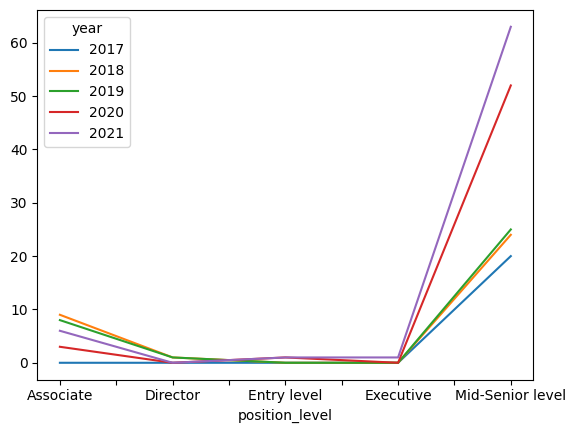

In [ ]:
table.fillna(0, inplace=True)
table.T.plot()
plt.show()

In [ ]:
dar.groupby(['position_level', 'year'])['yoe'].mean().unstack(level=-1)

year,2017,2018,2019,2020,2021
position_level,,,,,
Associate,NaN,3.333333,3.0,4.000000,3.166667
Director,NaN,8.000000,8.0,NaN,NaN
Entry level,NaN,NaN,NaN,2.000000,2.000000
Executive,NaN,NaN,NaN,NaN,15.000000
Mid-Senior level,4.95,5.250000,5.6,5.711538,5.730159


In [ ]:
dar.groupby(['year', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,NaN,1.0,1.0,NaN,1.0,16.0,NaN,1.0
2018,NaN,NaN,5.0,3.0,1.0,24.0,NaN,1.0
2019,NaN,NaN,2.0,1.0,2.0,28.0,NaN,1.0
2020,NaN,NaN,1.0,4.0,4.0,44.0,1.0,1.0
2021,1.0,1.0,5.0,1.0,2.0,57.0,NaN,4.0


In [ ]:
dar.groupby(['position_level', 'company_size'])['job_id'].count().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
position_level,,,,,,,,
Associate,NaN,NaN,8.0,3.0,3.0,10.0,NaN,2.0
Director,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Entry level,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
Executive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Mid-Senior level,1.0,2.0,6.0,5.0,6.0,157.0,1.0,5.0


In [ ]:
dar_skills = pd.merge(dar, job_skills, how='inner', on='job_id')
dar_skills = dar_skills[['job_id', 'position_level', 'yoe', 'company_industry', 'company_size', 'year', 'month', 'skills']].copy()

In [ ]:
len(set(dar_skills['skills']))

81

In [ ]:
dar_skills['skills'].value_counts().sort_values(ascending=False).head(10)

sql          194
etl          120
data_lake    107
cloud        103
ibm           89
aws           83
python        79
nosql         76
agile         74
bi            73
Name: skills, dtype: int64

In [ ]:
dar_skills.groupby('year')['skills'].nunique()

year
2017    31
2018    51
2019    47
2020    65
2021    57
Name: skills, dtype: int64

In [ ]:
table = dar_skills.groupby('year')['skills'].value_counts()
dict_data = {}
for year in range(2017, 2022):
    top = table.loc[str(year)].head(10)
    value = [str(i) + ': ' + str(top[i]) for i in top.index]
    dict_data[year] = value
pd.DataFrame(dict_data)

,2017,2018,2019,2020,2021
0,sql: 19,sql: 31,sql: 29,sql: 50,sql: 65
1,etl: 16,cloud: 20,etl: 25,cloud: 32,cloud: 38
2,data_lake: 14,etl: 18,data_lake: 20,aws: 29,etl: 34
3,ibm: 13,data_lake: 15,ibm: 18,data_lake: 28,agile: 32
4,python: 6,aws: 14,cloud: 8,etl: 27,aws: 32
5,cloud: 5,mongodb: 12,bi: 7,python: 27,nosql: 32
6,spark: 5,nosql: 12,agile: 5,mongodb: 25,devops: 31
7,bi: 4,bi: 11,aws: 5,nosql: 25,python: 31
8,nosql: 4,ibm: 11,warehousing: 5,agile: 24,bi: 30
9,agile: 3,python: 11,machine_learning: 4,devops: 24,data_lake: 30


In [ ]:
top_skill_change_by_level(dar_skills, 'Associate')

,2018,2019,2020,2021
Associate,,,,
0,sql: 7,sql: 7,azure: 3,cloud: 5
1,cloud: 6,etl: 4,cloud: 3,hadoop: 4
2,hadoop: 5,warehousing: 4,hadoop: 3,sql: 4
3,aws: 4,cloud: 3,ai: 2,tableau: 4
4,etl: 4,bi: 2,c++: 2,aws: 3
5,oracle: 4,database: 2,golang: 2,azure: 3
6,tableau: 4,sap: 2,java: 2,bi: 2
7,azure: 3,agile: 1,machine_learning: 2,data_lake: 2
8,database: 3,ai: 1,mongodb: 2,docker: 2


In [ ]:
top_skill_change_by_level(dar_skills, 'Mid-Senior level')

,2017,2018,2019,2020,2021
Mid-Senior level,,,,,
0,sql: 19,sql: 23,sql: 22,sql: 48,sql: 59
1,etl: 16,cloud: 13,etl: 21,aws: 28,cloud: 33
2,data_lake: 14,data_lake: 13,data_lake: 19,cloud: 28,etl: 31
3,ibm: 13,etl: 13,ibm: 18,etl: 27,python: 31
4,python: 6,ibm: 11,bi: 5,data_lake: 26,agile: 30
5,cloud: 5,agile: 10,cloud: 5,python: 25,nosql: 30
6,spark: 5,aws: 10,agile: 4,agile: 24,spark: 30
7,bi: 4,nosql: 10,aws: 4,devops: 24,aws: 29
8,nosql: 4,spark: 10,python: 4,mongodb: 23,devops: 29


In [ ]:
dar_skills.groupby(['year', 'company_size'])['skills'].nunique().unstack(level=-1).iloc[:, [1, 3, 7, 4, 6, 0, 5, 2]]

company_size,1-10,11-50,51-200,201-500,"501-1,000","1,001-5,000","5,001-10,000","10,001+"
year,,,,,,,,
2017,NaN,3.0,8.0,NaN,10.0,18.0,NaN,14.0
2018,NaN,NaN,17.0,28.0,8.0,38.0,NaN,14.0
2019,NaN,NaN,11.0,14.0,14.0,30.0,NaN,5.0
2020,NaN,NaN,18.0,39.0,34.0,32.0,14.0,6.0
2021,8.0,12.0,29.0,9.0,24.0,39.0,NaN,24.0


In [ ]:
def top_5_skill_change_by_size(frame_skill, size):
    table = frame_skill.query('company_size == @size').groupby('year')['skills'].value_counts()
    dict_data = {}
    for year in range(2017, 2022):
        try:
            table.loc[str(year)].head(5)
        except KeyError:
            continue
        else:
            top = table.loc[str(year)].head(5)
            value = [str(i) + ': ' + str(top[i]) for i in top.index]
            dict_data[year] = value
    result = pd.DataFrame(dict_data).rename_axis(size+' employees', axis=0)
    return result

In [ ]:
top_5_skill_change_by_size(dar_skills, '51-200')

,2017,2018,2019,2020,2021
51-200 employees,,,,,
0,bi: 1,sql: 5,cloud: 2,agile: 1,sql: 5
1,database: 1,cloud: 4,sql: 2,ai: 1,cloud: 3
2,etl: 1,aws: 3,aws: 1,aws: 1,hadoop: 3
3,powerbi: 1,hadoop: 3,database: 1,azure: 1,tableau: 3
4,server: 1,oracle: 3,hadoop: 1,bigquery: 1,aws: 2


In [ ]:
top_5_skill_change_by_size(dar_skills, '201-500')

,2018,2019,2020,2021
201-500 employees,,,,
0,cloud: 3,ai: 1,python: 4,ci/cd: 1
1,agile: 2,aws: 1,ai: 3,database: 1
2,aws: 2,cloud: 1,azure: 3,devops: 1
3,azure: 2,data_lake: 1,cloud: 3,etl: 1
4,java: 2,etl: 1,golang: 3,excel: 1


In [ ]:
top_5_skill_change_by_size(dar_skills, '501-1,000')

,2017,2018,2019,2020,2021
"501-1,000 employees",,,,,
0,bigquery: 1,azure: 1,etl: 2,azure: 4,sql: 2
1,cloud: 1,cloud: 1,microsoft: 2,cloud: 4,agile: 1
2,database: 1,data_lake: 1,sql: 2,database: 3,ai: 1
3,etl: 1,powerbi: 1,azure: 1,sql: 3,apache: 1
4,gcp: 1,redshift: 1,bi: 1,aws: 2,aws: 1


In [ ]:
top_5_skill_change_by_size(dar_skills, '1,001-5,000')

,2017,2018,2019,2020,2021
"1,001-5,000 employees",,,,,
0,sql: 16,sql: 23,sql: 24,sql: 44,sql: 53
1,data_lake: 13,etl: 15,etl: 21,aws: 22,agile: 29
2,etl: 13,data_lake: 12,data_lake: 18,cloud: 22,cloud: 29
3,ibm: 13,cloud: 11,ibm: 18,data_lake: 22,nosql: 29
4,agile: 3,ibm: 11,bi: 6,etl: 22,mongodb: 28


In [ ]:
top_5_skill_change_by_size(dar_skills, '10,001+')

,2017,2018,2019,2020,2021
"10,001+ employees",,,,,
0,bash: 1,bash: 1,data_lake: 1,aws: 1,cloud: 3
1,cloud: 1,cloud: 1,etl: 1,azure: 1,tableau: 3
2,data_lake: 1,data_lake: 1,golang: 1,cloud: 1,agile: 2
3,database: 1,database: 1,sql: 1,database: 1,database: 2
4,etl: 1,etl: 1,warehousing: 1,gcp: 1,etl: 2


# Conclusions

### Commons

- Number of postings of all data titles increase over time (5-year time span).
- The ascending order of titles is the same for both total amounts and growth: Data Engineer, Data Scientist, Data Analysis, and finally Data Architect.
- The job's type is mainly full-time and contract. Data Architect has only these two. It has had just 11 Internship, 12 Part-time, and 9 Temporary job for 5 years.
- All titles have same pattern of percentages of job's level: the highest is Mid-Senior, next Associate and Entry level. The total of Director's postings is very low and Executive's the lowest. The values of percentages is almost identical for Data Engineer and Data Scientist.
    - When it comes to the total number, Data Analyst, Data Engineer, and Data Scientist titles have share the same pattern across all company's sizes and with the increase year-by-year.
    - There's only one Data Analyst's Executive posting.
    - Data Architect jobs aren't open for Entry level (only one in 2020 and one in 2021). Mid-Senior level is still the majority.

- The average of YoE of Data Architect is the highest among Entry levels. The lowest among Executive levels is Data Scientist. The other averages is nearly equal over titles.
    - Considering the time change, Data Analyst and Data Engineer jobs have the averages of each level differ only small gaps across years.

- The average of YoE of a Associate level is higher than Entry level for all titles.

- The total number of industries require Data Architect is the lowest (only 12). Other titles have nearly even values of this summation and they increase over time.

- The companies who recruit new data employees most is in the size of 1001-5000 employees. The 2nd position is of the organizations with 51-500 employees. There're possibly some reasons for that:
    - May be there're many companies of these sizes.
    - May be these companies want to invest more on data departments.
    - May be these companies are in the industries that relate to the field of data most.

- The above pattern is true for Data Engineer, Data Scientist, and Data Scientist.
- The number of required skills of Data Analyst and Data Engineer share the same trend.
- The 2nd position in the case of Analyst titles additionally includes 10000+ employees companies.
- The number of skills needed increase over time of all company's sizes excluding Data Architect. Only for Data Architect, the increase isn't monotonic. Moreover, there're some skills are out-dated for all titles.

### Required Skills

From now on, the context of all conclusion, if not mentioned otherwise, is always the top 10.

Data Analyst:
- The top skill of a Data Analyst of all years, that calculated by the total amount of requirements, is SQL. The 2nd and 3rd rank are Python and Tableau. The next tier includes Excel and R.
	- For Entry level, Excel is the 2nd most wanted skill, left Python and Tableau behind. The top 10 of 2021 introduce Machine Learning.
	- ETL is required in top 10 for Mid-Senior level.
	- For only the size of 1001-5000 employees, the top 10 contains Hadoop.
	- For only the size of 10000+ employees, Excel is more weighted than Tableau.

Data Engineer:
- The most wanted skill of a Data Engineer of all years is Cloud, especially AWS. The other top positions have the stable occurences of Python, Azure, SQL Database, ETL, Spark and Snowflake.
	- For Associate, Entry level and size of 201-500 employees, the top ones are Python and SQL.
	- Machine Learning is a top 10 skill of only Entry level and not require for the organizations with 1001-5000 employees.
	- Mid-Senior engineer uses Redshift more often.
	- In the companies having the size of 51-200 employees, Python is highest priority.

Data Scientist:
- The top 5 skills of a Data Scientist is consistent over time: Python, Machine Learning, SQL, R, and AI. Cloud and Database are also required. Tableau is the 8th position over 5 years.
	- Only in Associate level, SQL is more important than Machine Learning.

Data Architect:
- The essential skills of all times include SQL, ETL, Cloud, and Data Lake.
- SQL isn't the number one for Associate level.
- The required skills is varying very much for each company's size.

### Usage

This work and all above conclusions is strictly based on the dataset, which, in turn, are recorded in time range of 5 years only. This data, as we can see, is very friendly for who are new or find a switch-career change in the data job market. One can use it, with the help of above codings, to query anything to clarify the targets, the suggested skills, or the recommended job per level based on the amount of postings over time. For instance, Data Architect isn't for newbie, Associate level is always require SQL or Python but with the YoE is higher than Entry level, Tableau is more necessary than PowerBI and Data Studio,...

One might be curious about other job, such as Business, Software, Developer, etc. New data, particular filters by titles or other useful queries can be exploit using the similar codings or with arbitrary level of extent.